<a href="https://colab.research.google.com/github/Eduardo-G0nzalez/ev4MachineLearning/blob/main/kNearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo kNearestNeighbors (kNN)


## Desarrollo Modelo

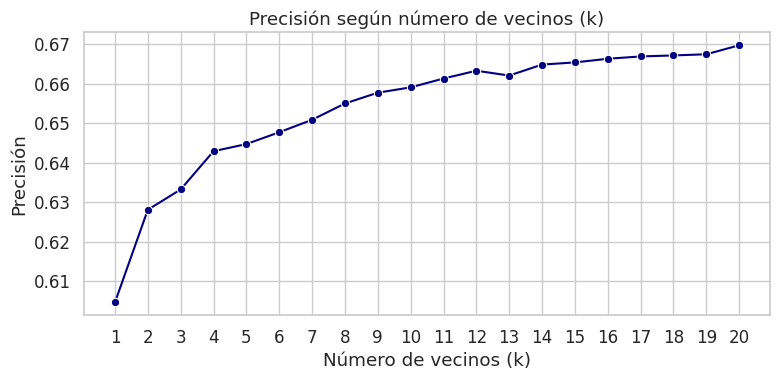

🔍 Mejor k encontrado: 20
✅ Precisión del modelo kNN: 0.6696985009263938

📋 Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.69      0.81      0.75     14216
           1       0.62      0.46      0.53      9532

    accuracy                           0.67     23748
   macro avg       0.66      0.63      0.64     23748
weighted avg       0.66      0.67      0.66     23748



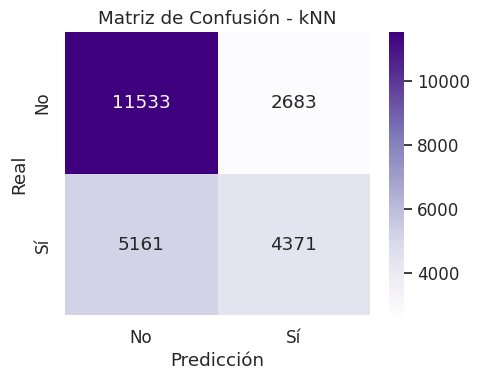

/tmp/ipython-input-2-2836943025.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Survived", y="RoundKills", data=df, palette="Set2")


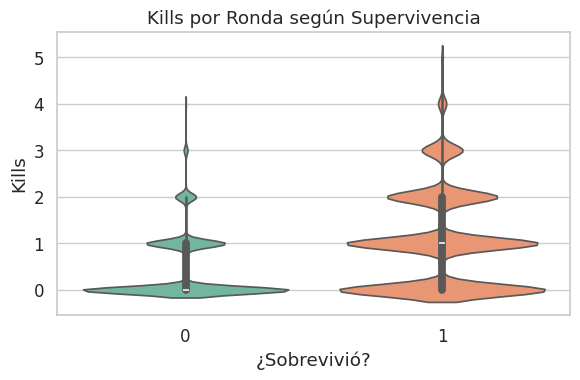

/tmp/ipython-input-2-2836943025.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="pastel")


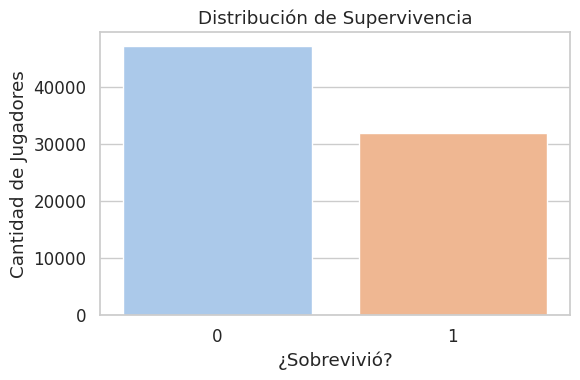

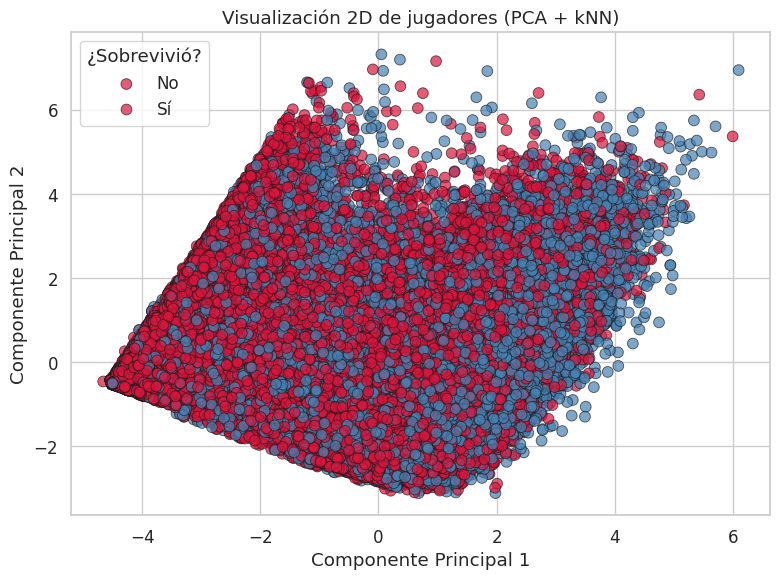

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# --- Cargar y preparar los datos ---
df = pd.read_csv("Anexo.csv", sep=";", low_memory=False)
df = df.drop(columns=["Unnamed: 0", "MatchId", "RoundId", "FirstKillTime", "TimeAlive", "TravelledDistance"])

# Codificar columnas categóricas
for col in ["Map", "Team"]:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

df["Survived"] = df["Survived"].astype(int)

# Separar X e y
X = df.drop(columns=["Survived", "RoundWinner", "MatchWinner", "AbnormalMatch"])
y = df["Survived"]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# --- Búsqueda del mejor valor de k ---
scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_k))

# Visualizar precisión según k
plt.figure(figsize=(8,4))
sns.lineplot(x=k_values, y=scores, marker='o', color='navy')
plt.title("Precisión según número de vecinos (k)")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Precisión")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Entrenar modelo final con el mejor k ---
best_k = k_values[scores.index(max(scores))]
print(f"🔍 Mejor k encontrado: {best_k}")

knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# --- Evaluar modelo final ---
print("✅ Precisión del modelo kNN:", accuracy_score(y_test, y_pred))
print("\n📋 Reporte de clasificación:\n", classification_report(y_test, y_pred))

# --- Matriz de Confusión ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
plt.title("Matriz de Confusión - kNN")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# --- Violinplot: Kills vs Supervivencia ---
plt.figure(figsize=(6,4))
sns.violinplot(x="Survived", y="RoundKills", data=df, palette="Set2")
plt.title("Kills por Ronda según Supervivencia")
plt.xlabel("¿Sobrevivió?")
plt.ylabel("Kills")
plt.tight_layout()
plt.show()

# --- Distribución de Supervivencia ---
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df, palette="pastel")
plt.title("Distribución de Supervivencia")
plt.xlabel("¿Sobrevivió?")
plt.ylabel("Cantidad de Jugadores")
plt.tight_layout()
plt.show()

# --- Visualización 2D estilo profe con PCA ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_pca, y)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette={0: "crimson", 1: "steelblue"},
                alpha=0.7, edgecolor="k", s=60)
plt.title("Visualización 2D de jugadores (PCA + kNN)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="¿Sobrevivió?", labels=["No", "Sí"])
plt.grid(True)
plt.tight_layout()
plt.show()

## Interpretación datos obtenidos

 Modelo kNN (k=20)
El modelo predice si un jugador sobrevive en base a los 20 más parecidos. Su precisión fue del 66.9%.

Qué tan bien predice
- Acierta mucho con los que no sobreviven (81%).
- Le cuesta más con los que sí sobreviven (46%).

Distribución de datos    
- Hay más jugadores que mueren que los que sobreviven. Por eso el modelo aprende más fácilmente a detectar muertes.  

Kills y supervivencia
- El modelo detecta que los que más kills hacen tienden a sobrevivir más. Tus gráficas refuerzan eso.  

Visualización 2D  
- Con PCA pudiste ver cómo se agrupan los jugadores en el espacio. No hay una separación perfecta entre clases, lo que explica por qué el modelo no es 100% preciso.

En resumen: el modelo funciona bien, especialmente para detectar muertes. Muestra que el desempeño (kills, equipamiento) sí influye en la supervivencia
